In [10]:
import os
import shutil
import random
from utils.mamba_out import MambaOut
from utils.train import ImageClassifierTrainer
import kagglehub
import numpy as np
from pepeline import read, ImgFormat
import torch
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [30]:
# download dataset
path = kagglehub.dataset_download("alxmamaev/flowers-recognition")
dataset_folder = os.path.join(path,"flowers")
folders = os.listdir(dataset_folder)
train = "app/train_data/train"
test = "app/train_data/test"
val = "app/train_data/val"
os.makedirs(train, exist_ok=True)
os.makedirs(test, exist_ok=True)
os.makedirs(val, exist_ok=True)
n = 0
for index in range(len(folders)):
    folder_imgs = os.path.join(dataset_folder, folders[index])
    img_set = set(os.listdir(folder_imgs))
    test_set = set(list(img_set)[:10])
    img_set = img_set - test_set
    val_set = set(list(img_set)[:16])
    img_set = img_set-val_set 
    for img_name in img_set:
        shutil.copyfile(os.path.join(folder_imgs,img_name),os.path.join(train,f"{n:04}_{index}.jpg"))
        n+=1
    for img_name in val_set:
        shutil.copyfile(os.path.join(folder_imgs,img_name),os.path.join(val,f"{n:04}_{index}.jpg"))
        n+=1
    for img_name in test_set:
        shutil.copyfile(os.path.join(folder_imgs,img_name),os.path.join(test,f"{n:04}_{index}.jpg"))
        n+=1
# print("Path to dataset files:", path)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 225M/225M [00:21<00:00, 11.2MB/s]

Extracting files...


In [4]:
# Train Model
model = MambaOut()
trainer = ImageClassifierTrainer(
    model,
    "train_data/train",
    "train_data/val",
    "checkpoints",
    5,
)

# # Загрузка чекпоинта
# trainer.load_checkpoint("checkpoints/best_model.pth")
# Обучение модели
trainer.train()
# trainer.validate() #Валидация

/run/media/umzi/H/flowernn/app/utils/train.py:138: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler_g = torch.cuda.amp.GradScaler(enabled=use_amp)
/run/media/umzi/H/flowernn/app/utils/train.py:201: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=self.scaler_g.is_enabled()):
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:35<00:00,  1.86it/s]


Epoch [1/1000], Train Loss: 2.9863
Validation Loss: 1.5853, Accuracy: 33.75%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.34it/s]


Epoch [2/1000], Train Loss: 2.6472
Validation Loss: 1.4507, Accuracy: 33.75%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.41it/s]


Epoch [3/1000], Train Loss: 2.5532
Validation Loss: 1.3698, Accuracy: 41.25%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.51it/s]


Epoch [4/1000], Train Loss: 2.4979
Validation Loss: 1.2564, Accuracy: 42.50%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.44it/s]


Epoch [5/1000], Train Loss: 2.4489
Validation Loss: 1.2084, Accuracy: 40.00%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.36it/s]


Epoch [6/1000], Train Loss: 2.4020
Validation Loss: 1.1722, Accuracy: 43.75%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.26it/s]


Epoch [7/1000], Train Loss: 2.3356
Validation Loss: 1.1748, Accuracy: 48.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.57it/s]


Epoch [8/1000], Train Loss: 2.2946
Validation Loss: 1.2115, Accuracy: 55.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.32it/s]


Epoch [9/1000], Train Loss: 2.2459
Validation Loss: 1.1521, Accuracy: 56.25%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.32it/s]


Epoch [10/1000], Train Loss: 2.2198
Validation Loss: 1.0860, Accuracy: 55.00%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.29it/s]


Epoch [11/1000], Train Loss: 2.1803
Validation Loss: 1.0706, Accuracy: 56.25%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.60it/s]


Epoch [12/1000], Train Loss: 2.1611
Validation Loss: 1.0835, Accuracy: 57.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.48it/s]


Epoch [13/1000], Train Loss: 2.1420
Validation Loss: 1.0088, Accuracy: 61.25%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.56it/s]


Epoch [14/1000], Train Loss: 2.1190
Validation Loss: 1.1124, Accuracy: 55.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.24it/s]


Epoch [15/1000], Train Loss: 2.1057
Validation Loss: 1.0491, Accuracy: 52.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.38it/s]


Epoch [16/1000], Train Loss: 2.0874
Validation Loss: 1.0042, Accuracy: 57.50%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.72it/s]


Epoch [17/1000], Train Loss: 2.0560
Validation Loss: 0.9351, Accuracy: 56.25%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.47it/s]


Epoch [18/1000], Train Loss: 2.0454
Validation Loss: 0.9048, Accuracy: 60.00%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.43it/s]


Epoch [19/1000], Train Loss: 2.0483
Validation Loss: 0.9829, Accuracy: 65.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.47it/s]


Epoch [20/1000], Train Loss: 2.0231
Validation Loss: 0.8751, Accuracy: 67.50%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.60it/s]


Epoch [21/1000], Train Loss: 2.0065
Validation Loss: 0.8800, Accuracy: 62.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.59it/s]


Epoch [22/1000], Train Loss: 2.0021
Validation Loss: 0.8057, Accuracy: 62.50%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.44it/s]


Epoch [23/1000], Train Loss: 1.9748
Validation Loss: 0.9106, Accuracy: 61.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.48it/s]


Epoch [24/1000], Train Loss: 1.9934
Validation Loss: 1.0207, Accuracy: 58.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.62it/s]


Epoch [25/1000], Train Loss: 1.9691
Validation Loss: 0.7736, Accuracy: 66.25%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.14it/s]


Epoch [26/1000], Train Loss: 1.9712
Validation Loss: 0.8179, Accuracy: 67.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.61it/s]


Epoch [27/1000], Train Loss: 1.9642
Validation Loss: 0.7939, Accuracy: 70.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.67it/s]


Epoch [28/1000], Train Loss: 1.9238
Validation Loss: 0.8399, Accuracy: 71.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.46it/s]


Epoch [29/1000], Train Loss: 1.9285
Validation Loss: 0.7740, Accuracy: 61.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.58it/s]


Epoch [30/1000], Train Loss: 1.9190
Validation Loss: 0.8230, Accuracy: 63.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.64it/s]


Epoch [31/1000], Train Loss: 1.8916
Validation Loss: 0.9236, Accuracy: 63.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.39it/s]


Epoch [32/1000], Train Loss: 1.8842
Validation Loss: 0.6919, Accuracy: 68.75%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.32it/s]


Epoch [33/1000], Train Loss: 1.8788
Validation Loss: 0.8058, Accuracy: 65.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.16it/s]


Epoch [34/1000], Train Loss: 1.8386
Validation Loss: 0.7568, Accuracy: 63.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:13<00:00,  4.98it/s]


Epoch [35/1000], Train Loss: 1.8682
Validation Loss: 0.8091, Accuracy: 68.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.29it/s]


Epoch [36/1000], Train Loss: 1.8637
Validation Loss: 0.6620, Accuracy: 75.00%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.43it/s]


Epoch [37/1000], Train Loss: 1.8450
Validation Loss: 0.7549, Accuracy: 70.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.25it/s]


Epoch [38/1000], Train Loss: 1.8521
Validation Loss: 0.7608, Accuracy: 75.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.57it/s]


Epoch [39/1000], Train Loss: 1.8443
Validation Loss: 0.8262, Accuracy: 68.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.69it/s]


Epoch [40/1000], Train Loss: 1.8193
Validation Loss: 0.7796, Accuracy: 71.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.17it/s]


Epoch [41/1000], Train Loss: 1.8097
Validation Loss: 0.6239, Accuracy: 78.75%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.24it/s]


Epoch [42/1000], Train Loss: 1.8054
Validation Loss: 0.6412, Accuracy: 75.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.22it/s]


Epoch [43/1000], Train Loss: 1.8038
Validation Loss: 0.7141, Accuracy: 73.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.62it/s]


Epoch [44/1000], Train Loss: 1.7970
Validation Loss: 0.6639, Accuracy: 76.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.48it/s]


Epoch [45/1000], Train Loss: 1.7945
Validation Loss: 0.6383, Accuracy: 73.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.56it/s]


Epoch [46/1000], Train Loss: 1.7786
Validation Loss: 0.7090, Accuracy: 70.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.70it/s]


Epoch [47/1000], Train Loss: 1.7712
Validation Loss: 0.7052, Accuracy: 73.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.61it/s]


Epoch [48/1000], Train Loss: 1.7511
Validation Loss: 0.6961, Accuracy: 75.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.26it/s]


Epoch [49/1000], Train Loss: 1.7700
Validation Loss: 0.6550, Accuracy: 75.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.40it/s]


Epoch [50/1000], Train Loss: 1.7429
Validation Loss: 0.6086, Accuracy: 77.50%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.49it/s]


Epoch [51/1000], Train Loss: 1.7557
Validation Loss: 0.5989, Accuracy: 75.00%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.33it/s]


Epoch [52/1000], Train Loss: 1.7423
Validation Loss: 0.7064, Accuracy: 71.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.16it/s]


Epoch [53/1000], Train Loss: 1.7243
Validation Loss: 0.6487, Accuracy: 71.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.16it/s]


Epoch [54/1000], Train Loss: 1.7048
Validation Loss: 0.7575, Accuracy: 70.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.30it/s]


Epoch [55/1000], Train Loss: 1.7414
Validation Loss: 0.7166, Accuracy: 71.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.36it/s]


Epoch [56/1000], Train Loss: 1.7188
Validation Loss: 0.7046, Accuracy: 72.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.50it/s]


Epoch [57/1000], Train Loss: 1.6942
Validation Loss: 0.5880, Accuracy: 78.75%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.22it/s]


Epoch [58/1000], Train Loss: 1.7090
Validation Loss: 0.6831, Accuracy: 75.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.31it/s]


Epoch [59/1000], Train Loss: 1.6887
Validation Loss: 0.7252, Accuracy: 72.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.56it/s]


Epoch [60/1000], Train Loss: 1.7037
Validation Loss: 0.6244, Accuracy: 71.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.56it/s]


Epoch [61/1000], Train Loss: 1.6876
Validation Loss: 0.6672, Accuracy: 72.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.32it/s]


Epoch [62/1000], Train Loss: 1.6721
Validation Loss: 0.6135, Accuracy: 73.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.36it/s]


Epoch [63/1000], Train Loss: 1.6455
Validation Loss: 0.6877, Accuracy: 76.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.23it/s]


Epoch [64/1000], Train Loss: 1.6537
Validation Loss: 0.6452, Accuracy: 76.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.22it/s]


Epoch [65/1000], Train Loss: 1.6319
Validation Loss: 0.5185, Accuracy: 78.75%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.23it/s]


Epoch [66/1000], Train Loss: 1.6318
Validation Loss: 0.5762, Accuracy: 77.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.32it/s]


Epoch [67/1000], Train Loss: 1.6337
Validation Loss: 0.6260, Accuracy: 75.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.19it/s]


Epoch [68/1000], Train Loss: 1.6463
Validation Loss: 0.5683, Accuracy: 78.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.29it/s]


Epoch [69/1000], Train Loss: 1.6380
Validation Loss: 0.6396, Accuracy: 81.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.67it/s]


Epoch [70/1000], Train Loss: 1.6390
Validation Loss: 0.5664, Accuracy: 80.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.39it/s]


Epoch [71/1000], Train Loss: 1.6165
Validation Loss: 0.5567, Accuracy: 80.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.53it/s]


Epoch [72/1000], Train Loss: 1.6113
Validation Loss: 0.5608, Accuracy: 78.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.44it/s]


Epoch [73/1000], Train Loss: 1.6053
Validation Loss: 0.6169, Accuracy: 75.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.45it/s]


Epoch [74/1000], Train Loss: 1.5980
Validation Loss: 0.5936, Accuracy: 77.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.21it/s]


Epoch [75/1000], Train Loss: 1.5738
Validation Loss: 0.6566, Accuracy: 81.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.38it/s]


Epoch [76/1000], Train Loss: 1.5757
Validation Loss: 0.7302, Accuracy: 71.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.39it/s]


Epoch [77/1000], Train Loss: 1.5849
Validation Loss: 0.6439, Accuracy: 75.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.28it/s]


Epoch [78/1000], Train Loss: 1.5926
Validation Loss: 0.6124, Accuracy: 78.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.28it/s]


Epoch [79/1000], Train Loss: 1.5844
Validation Loss: 0.5450, Accuracy: 80.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.51it/s]


Epoch [80/1000], Train Loss: 1.5676
Validation Loss: 0.5789, Accuracy: 78.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.62it/s]


Epoch [81/1000], Train Loss: 1.5503
Validation Loss: 0.6918, Accuracy: 72.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.52it/s]


Epoch [82/1000], Train Loss: 1.5774
Validation Loss: 0.5507, Accuracy: 72.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.33it/s]


Epoch [83/1000], Train Loss: 1.5693
Validation Loss: 0.5542, Accuracy: 82.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.44it/s]


Epoch [84/1000], Train Loss: 1.5610
Validation Loss: 0.5139, Accuracy: 82.50%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.40it/s]


Epoch [85/1000], Train Loss: 1.5595
Validation Loss: 0.5634, Accuracy: 81.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.53it/s]


Epoch [86/1000], Train Loss: 1.5605
Validation Loss: 0.5856, Accuracy: 81.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.22it/s]


Epoch [87/1000], Train Loss: 1.5613
Validation Loss: 0.5886, Accuracy: 80.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.17it/s]


Epoch [88/1000], Train Loss: 1.5287
Validation Loss: 0.5550, Accuracy: 76.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.39it/s]


Epoch [89/1000], Train Loss: 1.5541
Validation Loss: 0.5385, Accuracy: 78.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.61it/s]


Epoch [90/1000], Train Loss: 1.5555
Validation Loss: 0.6797, Accuracy: 77.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.66it/s]


Epoch [91/1000], Train Loss: 1.5492
Validation Loss: 0.7498, Accuracy: 72.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.52it/s]


Epoch [92/1000], Train Loss: 1.5340
Validation Loss: 0.5191, Accuracy: 81.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.30it/s]


Epoch [93/1000], Train Loss: 1.5147
Validation Loss: 0.6223, Accuracy: 80.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.49it/s]


Epoch [94/1000], Train Loss: 1.5014
Validation Loss: 0.5311, Accuracy: 81.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.46it/s]


Epoch [95/1000], Train Loss: 1.5060
Validation Loss: 0.6802, Accuracy: 78.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.42it/s]


Epoch [96/1000], Train Loss: 1.4948
Validation Loss: 0.5401, Accuracy: 82.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.58it/s]


Epoch [97/1000], Train Loss: 1.5108
Validation Loss: 0.5781, Accuracy: 77.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.43it/s]


Epoch [98/1000], Train Loss: 1.5066
Validation Loss: 0.6258, Accuracy: 78.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.43it/s]


Epoch [99/1000], Train Loss: 1.4801
Validation Loss: 0.5440, Accuracy: 85.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:13<00:00,  4.94it/s]


Epoch [100/1000], Train Loss: 1.4846
Validation Loss: 0.5504, Accuracy: 78.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:46<00:00,  1.42it/s]


Epoch [101/1000], Train Loss: 1.4826
Validation Loss: 0.5327, Accuracy: 75.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.22it/s]


Epoch [102/1000], Train Loss: 1.4680
Validation Loss: 0.5839, Accuracy: 80.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.40it/s]


Epoch [103/1000], Train Loss: 1.4932
Validation Loss: 0.5777, Accuracy: 78.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.45it/s]


Epoch [104/1000], Train Loss: 1.4680
Validation Loss: 0.5282, Accuracy: 81.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.47it/s]


Epoch [105/1000], Train Loss: 1.4580
Validation Loss: 0.5351, Accuracy: 80.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.44it/s]


Epoch [106/1000], Train Loss: 1.4485
Validation Loss: 0.5543, Accuracy: 81.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.32it/s]


Epoch [107/1000], Train Loss: 1.4527
Validation Loss: 0.5267, Accuracy: 81.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.23it/s]


Epoch [108/1000], Train Loss: 1.4528
Validation Loss: 0.4870, Accuracy: 82.50%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.45it/s]


Epoch [109/1000], Train Loss: 1.4593
Validation Loss: 0.5160, Accuracy: 80.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.58it/s]


Epoch [110/1000], Train Loss: 1.4701
Validation Loss: 0.6238, Accuracy: 78.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.14it/s]


Epoch [111/1000], Train Loss: 1.4580
Validation Loss: 0.6320, Accuracy: 77.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.54it/s]


Epoch [112/1000], Train Loss: 1.4563
Validation Loss: 0.5294, Accuracy: 80.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.64it/s]


Epoch [113/1000], Train Loss: 1.4394
Validation Loss: 0.5596, Accuracy: 80.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.70it/s]


Epoch [114/1000], Train Loss: 1.4575
Validation Loss: 0.7251, Accuracy: 82.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.39it/s]


Epoch [115/1000], Train Loss: 1.4414
Validation Loss: 0.4227, Accuracy: 83.75%
Best checkpoint saved!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.61it/s]


Epoch [116/1000], Train Loss: 1.4272
Validation Loss: 0.6368, Accuracy: 80.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:24<00:00,  2.64it/s]


Epoch [117/1000], Train Loss: 1.4392
Validation Loss: 0.5317, Accuracy: 80.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:27<00:00,  2.38it/s]


Epoch [118/1000], Train Loss: 1.4354
Validation Loss: 0.7184, Accuracy: 77.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:15<00:00,  4.35it/s]


Epoch [119/1000], Train Loss: 1.4557
Validation Loss: 0.5315, Accuracy: 80.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.51it/s]


Epoch [120/1000], Train Loss: 1.4170
Validation Loss: 0.4955, Accuracy: 82.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.48it/s]


Epoch [121/1000], Train Loss: 1.4264
Validation Loss: 0.4588, Accuracy: 83.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.39it/s]


Epoch [122/1000], Train Loss: 1.4526
Validation Loss: 0.6108, Accuracy: 82.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.45it/s]


Epoch [123/1000], Train Loss: 1.4125
Validation Loss: 0.5197, Accuracy: 82.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.17it/s]


Epoch [124/1000], Train Loss: 1.4021
Validation Loss: 0.4471, Accuracy: 82.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.19it/s]


Epoch [125/1000], Train Loss: 1.3829
Validation Loss: 0.4652, Accuracy: 86.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.42it/s]


Epoch [126/1000], Train Loss: 1.3852
Validation Loss: 0.5939, Accuracy: 81.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.12it/s]


Epoch [127/1000], Train Loss: 1.3869
Validation Loss: 0.5084, Accuracy: 82.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.16it/s]


Epoch [128/1000], Train Loss: 1.3938
Validation Loss: 0.6646, Accuracy: 78.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.18it/s]


Epoch [129/1000], Train Loss: 1.4124
Validation Loss: 0.6184, Accuracy: 78.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.44it/s]


Epoch [130/1000], Train Loss: 1.3850
Validation Loss: 0.7716, Accuracy: 76.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.35it/s]


Epoch [131/1000], Train Loss: 1.4029
Validation Loss: 0.5120, Accuracy: 85.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.41it/s]


Epoch [132/1000], Train Loss: 1.3991
Validation Loss: 0.5455, Accuracy: 80.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.30it/s]


Epoch [133/1000], Train Loss: 1.4042
Validation Loss: 0.5065, Accuracy: 85.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.40it/s]


Epoch [134/1000], Train Loss: 1.4041
Validation Loss: 0.5481, Accuracy: 82.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:13<00:00,  4.95it/s]


Epoch [135/1000], Train Loss: 1.3814
Validation Loss: 0.5435, Accuracy: 82.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.15it/s]


Epoch [136/1000], Train Loss: 1.3780
Validation Loss: 0.6389, Accuracy: 81.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.39it/s]


Epoch [137/1000], Train Loss: 1.3666
Validation Loss: 0.6047, Accuracy: 82.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.49it/s]


Epoch [138/1000], Train Loss: 1.3738
Validation Loss: 0.5881, Accuracy: 78.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.28it/s]


Epoch [139/1000], Train Loss: 1.3602
Validation Loss: 0.5430, Accuracy: 85.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.36it/s]


Epoch [140/1000], Train Loss: 1.3704
Validation Loss: 0.6685, Accuracy: 78.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.32it/s]


Epoch [141/1000], Train Loss: 1.3707
Validation Loss: 0.6119, Accuracy: 85.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.54it/s]


Epoch [142/1000], Train Loss: 1.3697
Validation Loss: 0.8621, Accuracy: 72.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.28it/s]


Epoch [143/1000], Train Loss: 1.3659
Validation Loss: 0.8888, Accuracy: 75.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.31it/s]


Epoch [144/1000], Train Loss: 1.3659
Validation Loss: 0.9126, Accuracy: 78.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.33it/s]


Epoch [145/1000], Train Loss: 1.3793
Validation Loss: 0.9181, Accuracy: 72.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.43it/s]


Epoch [146/1000], Train Loss: 1.3591
Validation Loss: 0.7316, Accuracy: 81.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.44it/s]


Epoch [147/1000], Train Loss: 1.3608
Validation Loss: 0.5676, Accuracy: 81.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.36it/s]


Epoch [148/1000], Train Loss: 1.3681
Validation Loss: 0.7133, Accuracy: 77.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.53it/s]


Epoch [149/1000], Train Loss: 1.3724
Validation Loss: 0.7377, Accuracy: 76.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.49it/s]


Epoch [150/1000], Train Loss: 1.3806
Validation Loss: 0.7053, Accuracy: 73.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.27it/s]


Epoch [151/1000], Train Loss: 1.3877
Validation Loss: 0.6836, Accuracy: 76.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.37it/s]


Epoch [152/1000], Train Loss: 1.3685
Validation Loss: 0.5042, Accuracy: 85.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.42it/s]


Epoch [153/1000], Train Loss: 1.3569
Validation Loss: 0.6487, Accuracy: 80.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.46it/s]


Epoch [154/1000], Train Loss: 1.3730
Validation Loss: 0.6659, Accuracy: 75.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:13<00:00,  5.06it/s]


Epoch [155/1000], Train Loss: 1.3702
Validation Loss: 0.6216, Accuracy: 78.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.54it/s]


Epoch [156/1000], Train Loss: 1.3778
Validation Loss: 0.6282, Accuracy: 77.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.66it/s]


Epoch [157/1000], Train Loss: 1.3596
Validation Loss: 0.6217, Accuracy: 81.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.75it/s]


Epoch [158/1000], Train Loss: 1.3582
Validation Loss: 0.5625, Accuracy: 85.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.48it/s]


Epoch [159/1000], Train Loss: 1.3652
Validation Loss: 0.5774, Accuracy: 83.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.23it/s]


Epoch [160/1000], Train Loss: 1.3498
Validation Loss: 0.5051, Accuracy: 82.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.35it/s]


Epoch [161/1000], Train Loss: 1.3597
Validation Loss: 0.7366, Accuracy: 77.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.22it/s]


Epoch [162/1000], Train Loss: 1.3555
Validation Loss: 0.6141, Accuracy: 82.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.50it/s]


Epoch [163/1000], Train Loss: 1.3283
Validation Loss: 0.6108, Accuracy: 77.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.09it/s]


Epoch [164/1000], Train Loss: 1.3604
Validation Loss: 0.5293, Accuracy: 82.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.40it/s]


Epoch [165/1000], Train Loss: 1.3461
Validation Loss: 0.7952, Accuracy: 77.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.49it/s]


Epoch [166/1000], Train Loss: 1.3372
Validation Loss: 0.8772, Accuracy: 77.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.63it/s]


Epoch [167/1000], Train Loss: 1.3462
Validation Loss: 0.7027, Accuracy: 83.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.56it/s]


Epoch [168/1000], Train Loss: 1.3570
Validation Loss: 0.7880, Accuracy: 76.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.48it/s]


Epoch [169/1000], Train Loss: 1.3434
Validation Loss: 0.7413, Accuracy: 80.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.46it/s]


Epoch [170/1000], Train Loss: 1.3449
Validation Loss: 0.6730, Accuracy: 80.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.56it/s]


Epoch [171/1000], Train Loss: 1.3338
Validation Loss: 0.6586, Accuracy: 76.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.40it/s]


Epoch [172/1000], Train Loss: 1.3456
Validation Loss: 0.5880, Accuracy: 81.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.38it/s]


Epoch [173/1000], Train Loss: 1.3418
Validation Loss: 0.5852, Accuracy: 81.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.66it/s]


Epoch [174/1000], Train Loss: 1.3469
Validation Loss: 0.7584, Accuracy: 81.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.47it/s]


Epoch [175/1000], Train Loss: 1.3442
Validation Loss: 0.6582, Accuracy: 78.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.62it/s]


Epoch [176/1000], Train Loss: 1.3354
Validation Loss: 0.7078, Accuracy: 80.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.47it/s]


Epoch [177/1000], Train Loss: 1.3430
Validation Loss: 0.7845, Accuracy: 81.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.51it/s]


Epoch [178/1000], Train Loss: 1.3211
Validation Loss: 0.5984, Accuracy: 80.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.45it/s]


Epoch [179/1000], Train Loss: 1.3213
Validation Loss: 0.8950, Accuracy: 82.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.59it/s]


Epoch [180/1000], Train Loss: 1.3361
Validation Loss: 0.6240, Accuracy: 87.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.39it/s]


Epoch [181/1000], Train Loss: 1.3261
Validation Loss: 0.6694, Accuracy: 80.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:42<00:00,  1.56it/s]


Epoch [182/1000], Train Loss: 1.3031
Validation Loss: 0.5758, Accuracy: 85.00%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:20<00:00,  3.20it/s]


Epoch [183/1000], Train Loss: 1.2961
Validation Loss: 0.6468, Accuracy: 81.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:29<00:00,  2.23it/s]


Epoch [184/1000], Train Loss: 1.2962
Validation Loss: 0.7891, Accuracy: 77.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.55it/s]


Epoch [185/1000], Train Loss: 1.3126
Validation Loss: 0.7197, Accuracy: 81.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.38it/s]


Epoch [186/1000], Train Loss: 1.2826
Validation Loss: 0.6561, Accuracy: 81.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.53it/s]


Epoch [187/1000], Train Loss: 1.3089
Validation Loss: 0.7813, Accuracy: 78.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.54it/s]


Epoch [188/1000], Train Loss: 1.3054
Validation Loss: 0.8974, Accuracy: 76.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.58it/s]


Epoch [189/1000], Train Loss: 1.3244
Validation Loss: 0.6622, Accuracy: 82.50%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:11<00:00,  5.60it/s]


Epoch [190/1000], Train Loss: 1.3109
Validation Loss: 0.7098, Accuracy: 83.75%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.35it/s]


Epoch [191/1000], Train Loss: 1.3118
Validation Loss: 0.7635, Accuracy: 81.25%


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:12<00:00,  5.36it/s]


Epoch [192/1000], Train Loss: 1.2860
Validation Loss: 0.7873, Accuracy: 81.25%


 17%|███████████████████▊                                                                                                   | 11/66 [00:04<00:20,  2.68it/s]


KeyboardInterrupt: 

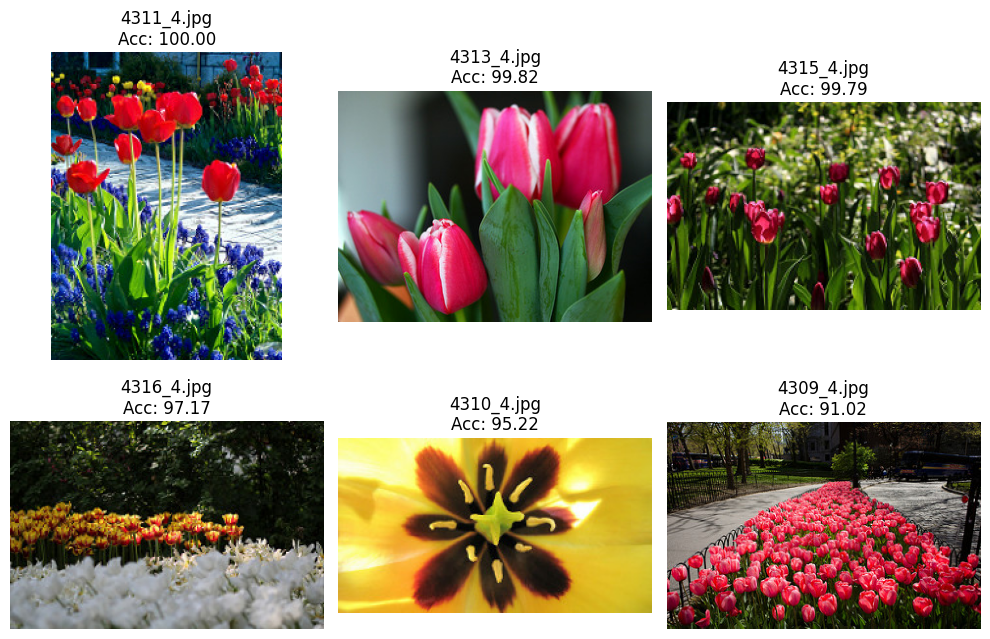

In [12]:
# Test
def load_checkpoint(model, checkpoint_path):
    checkpoint = torch.load(checkpoint_path, map_location="cpu")
    model_state = checkpoint["model_state_dict"]
    model.load_state_dict(model_state, strict=True)
    return model
    
def image2tensor(
    value: list[np.ndarray] | np.ndarray,
    out_type: torch.dtype = torch.float32,
):
    def _to_tensor(img: np.ndarray) -> torch.Tensor:
        if img.dtype == np.uint8:
            img = img.astype(np.float32) / 255.0

        if len(img.shape) == 2:
            tensor = torch.from_numpy(img[None, ...])
        else:
            tensor = torch.from_numpy(img.transpose(2, 0, 1))

        if tensor.dtype != out_type:
            tensor = tensor.to(out_type)

        return tensor

    if isinstance(value, list):
        return [_to_tensor(i) for i in value]
    else:
        return _to_tensor(value)

def plot_top5_images(folder_path, matches):
    """
    Отображает оригинальное изображение и топ-5 похожих в формате 2x3.
    :param folder_path: путь к папке с изображениями
    :param matches: список пар [accuracy, filename]
    """
    if len(matches) < 6:
        raise ValueError("Нужно минимум 6 изображений в списке: 1 оригинал и 5 похожих")

    fig, axes = plt.subplots(2, 3, figsize=(10, 7))

    for i, (acc, name) in enumerate(matches[:6]):
        img_path = os.path.join(folder_path, name)
        if not os.path.exists(img_path):
            raise FileNotFoundError(f"Файл {img_path} не найден")

        img = mpimg.imread(img_path)
        row, col = divmod(i, 3)

        axes[row, col].imshow(img)
        axes[row, col].set_title(f"{name}\nAcc: {acc:.2f}")
        axes[row, col].axis("off")

    plt.tight_layout()
    plt.show()
model = load_checkpoint(
    MambaOut(),
    "checkpoints/best_model.pth",
).eval()
img_list = os.listdir(folder)
folder = "train_data/test/"
img = image2tensor(
    read(os.path.join(folder,random.choice(img_list)), format=ImgFormat.F32)
).unsqueeze(0)
with torch.inference_mode():
    _, emb1 = model(img)
    
    emb_list = []
    for img_name in img_list:
        img = image2tensor(read(os.path.join(folder, img_name), format=ImgFormat.F32)).unsqueeze(0)
        _, emb2 = model(img)
        emb_list.append([((F.cosine_similarity(emb1, emb2)) * 100).cpu().item(), img_name])
sorted_data = sorted(emb_list, key=lambda x: x[0], reverse=True)
plot_top5_images(folder,sorted_data)